In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/01-census-income-all.csv')

In [3]:
df

,age,workclass,weight,education,edu num,marital status,occupation,relationship,race,sex,captial-gain,capital-loss,hours-per-week,native country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,No
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,No
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,No
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,No
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,No
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,No
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,No
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,No


In [4]:
df.shape

(48842, 15)

In [5]:
df.columns

Index(['age', 'workclass', 'weight', 'education', 'edu num', 'marital status',
       'occupation', 'relationship', 'race', 'sex', 'captial-gain',
       'capital-loss', 'hours-per-week', 'native country', 'label'],
      dtype='object')

# select columns

In [6]:
X = df[ ['age', 'edu num', 'captial-gain',
     'capital-loss', 'hours-per-week'  ] ]
X

,age,edu num,captial-gain,capital-loss,hours-per-week
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40
...,...,...,...,...,...
48837,39,13,0,0,36
48838,64,9,0,0,40
48839,38,13,0,0,50
48840,44,13,5455,0,40


In [7]:
y = df['label']
y

0         No
1         No
2         No
3         No
4         No
        ... 
48837     No
48838     No
48839     No
48840     No
48841    Yes
Name: label, Length: 48842, dtype: object

# Train test split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# KNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
knn = KNeighborsClassifier(n_neighbors=7)

In [12]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [13]:
knn.score(X_train, y_train)

0.8509456658050316

In [14]:
knn.score(X_test,y_test)

0.8280274337189067

In [15]:
knn.predict( X_train[0:3] )

array(['No', 'No', 'No'], dtype=object)

In [16]:
knn.predict_proba( [ [46,16,0,0,60], [25,12,15000,0,25] ] )

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([[0.28571429, 0.71428571],
       [0.        , 1.        ]])

In [17]:
knn.classes_

array(['No', 'Yes'], dtype=object)

# K-fold cross-validation

In [18]:
from sklearn.model_selection import cross_val_score

In [19]:
knn_cv = KNeighborsClassifier(n_neighbors=65)

In [20]:
cv_score = cross_val_score(knn_cv, X_train, y_train)

In [21]:
cv_score.mean()

0.836613339477464

In [22]:
knn9_cv = KNeighborsClassifier(n_neighbors=9)

In [23]:
cv9_score = cross_val_score(knn9_cv, X_train, y_train)

In [24]:
cv_score.mean()

0.836613339477464

In [25]:
cv9_score.mean()

0.831904357894954

# Grid Search

In [26]:
param_grid = { 'n_neighbors':[29,31,33,35,37,39,41,43,45] }

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
knn_gridsearch = KNeighborsClassifier()

In [29]:
grid_search = GridSearchCV(knn_gridsearch,
                           param_grid)

In [30]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [29, 31, 33, 35, 37, 39, 41, 43, 45]})

In [31]:
grid_search.cv_results_

{'mean_fit_time': array([0.15283141, 0.10837402, 0.06406207, 0.06178842, 0.06052446,
        0.06316371, 0.06504683, 0.06435266, 0.06117587]),
 'mean_score_time': array([1.84530206, 1.48579512, 0.68485408, 0.69867353, 0.67884216,
        0.68132124, 0.70694647, 0.69588985, 0.71079788]),
 'mean_test_score': array([0.83878883, 0.83896795, 0.83871202, 0.83768833, 0.83745798,
        0.83666461, 0.83645989, 0.83707412, 0.83707405]),
 'param_n_neighbors': masked_array(data=[29, 31, 33, 35, 37, 39, 41, 43, 45],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 29},
  {'n_neighbors': 31},
  {'n_neighbors': 33},
  {'n_neighbors': 35},
  {'n_neighbors': 37},
  {'n_neighbors': 39},
  {'n_neighbors': 41},
  {'n_neighbors': 43},
  {'n_neighbors': 45}],
 'rank_test_score': array([2, 1, 3, 4, 5, 8, 9, 6, 7], dtype=int32),
 'split0_test_score': array([0.84145873, 0.841

In [32]:
grid_search.best_params_

{'n_neighbors': 31}

In [33]:
grid_search.best_score_

0.8389679530858289

In [34]:
grid_search.score(X_train, y_train)

0.8478233050955903

In [35]:
grid_search.score(X_test, y_test)

0.8364213327873887

In [36]:
knn.kneighbors(X_test.iloc[[0],:])

(array([[0., 0., 0., 0., 0., 0., 0.]]),
 array([[12889, 17149, 13147, 15354, 12196, 12794,  3089]]))

In [37]:
X_test.iloc[[0],:]

,age,edu num,captial-gain,capital-loss,hours-per-week
1443,38,11,0,0,40


In [38]:
grid_search.best_estimator_.kneighbors(X_test.iloc[[0],:])

(array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.]]),
 array([[12196,  3089, 13147, 30059, 18436, 30410, 15354, 34799, 12794,
         17149, 24875, 30317, 31767, 29586, 37303, 33664, 12889, 20884,
         24398, 26687, 30756, 31598, 32939, 36708, 31943,  6792,   190,
          2074,  7329,  4101,  7091]]))

# Standardization

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
std_scaler = StandardScaler()

In [41]:
std_scaler.fit(X_train)

StandardScaler()

In [43]:
std_scaler.mean_

array([  38.67107721,   10.07160955, 1079.13884268,   87.31379725,
         40.41389195])

In [44]:
std_scaler.scale_

array([1.37142624e+01, 2.56818882e+00, 7.42022849e+03, 4.02215105e+02,
       1.23723514e+01])

In [47]:
X_train_transformed = std_scaler.transform(X_train)

In [48]:
pd.DataFrame(X_train_transformed, columns=X_train.columns)

,age,edu num,captial-gain,capital-loss,hours-per-week
0,-0.559350,0.361496,-0.145432,-0.217082,-0.033453
1,0.971902,-0.417263,-0.145432,-0.217082,-0.033453
2,0.315651,-1.974781,-0.145432,-0.217082,3.522864
3,-0.194766,-0.417263,-0.145432,-0.217082,-0.195104
4,-0.705184,-0.417263,-0.145432,-0.217082,-0.033453
...,...,...,...,...,...
39068,-0.996851,-0.027883,-0.145432,-0.217082,-1.245834
39069,-0.413517,-1.196022,-0.145432,-0.217082,-0.033453
39070,-0.851017,0.750876,-0.145432,-0.217082,-0.841707
39071,-1.215601,1.140255,-0.145432,-0.217082,-0.033453


In [49]:
grid_search.fit(X_train_transformed, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [29, 31, 33, 35, 37, 39, 41, 43, 45]})

In [50]:
grid_search.best_params_

{'n_neighbors': 37}

In [51]:
grid_search.best_score_

0.8268113288467424

In [52]:
grid_search.score(X_train_transformed, y_train)

0.8332096332505823

In [55]:
X_test_transformed = std_scaler.transform(X_test)

In [56]:
grid_search.score(X_test_transformed, y_test)

0.8234210256935203

# One-hot encoder

In [57]:
from sklearn.preprocessing import OneHotEncoder

In [58]:
encoder_1h = OneHotEncoder()

In [62]:
X_cat = df[['marital status']]

In [63]:
X_cat_train, X_cat_test, y_cat_train, y_cat_test = train_test_split(X_cat, y)

In [64]:
encoder_1h.fit(X_cat_train)

OneHotEncoder()

In [65]:
encoder_1h.get_feature_names_out()

array(['marital status_ Divorced', 'marital status_ Married-AF-spouse',
       'marital status_ Married-civ-spouse',
       'marital status_ Married-spouse-absent',
       'marital status_ Never-married', 'marital status_ Separated',
       'marital status_ Widowed'], dtype=object)

In [66]:
X_cat_train_transformed = encoder_1h.transform(X_cat_train)

In [75]:
X_cat_train_transformed.toarray()

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [69]:
knn.fit(X_cat_train_transformed, y_cat_train)

KNeighborsClassifier(n_neighbors=7)

In [71]:
X_cat_test_transformed = encoder_1h.transform(X_cat_test)

In [72]:
knn.score(X_cat_train_transformed, y_cat_train)

0.7598755152739483

In [73]:
knn.score(X_cat_test_transformed, y_cat_test)

0.7625092130046679

In [91]:
knn.predict(X_cat_test_transformed.toarray()[0:5])

array(['No', 'No', 'No', 'No', 'No'], dtype=object)

In [92]:
X_cat_test_transformed.toarray()[0:5]

array([[0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.]])

In [93]:
encoder_1h.inverse_transform(X_cat_test_transformed.toarray()[0:5])

array([[' Never-married'],
       [' Never-married'],
       [' Never-married'],
       [' Never-married'],
       [' Married-civ-spouse']], dtype=object)

# make_column_transformer

In [100]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler

In [96]:
X = df[ ['age', 'edu num', 'marital status', 'occupation',
         'sex', 'captial-gain','capital-loss', 'hours-per-week'  ] ]

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [101]:
transformer = make_column_transformer(
    ( MinMaxScaler(), ['age', 'edu num','captial-gain','capital-loss', 'hours-per-week'] ),
    ( OneHotEncoder(), ['marital status', 'occupation', 'sex' ])
)

In [102]:
X_train_transformed = transformer.fit_transform(X_train)

In [105]:
X_train_transformed.toarray().shape

(39073, 29)

In [106]:
transformer.get_feature_names_out()

array(['minmaxscaler__age', 'minmaxscaler__edu num',
       'minmaxscaler__captial-gain', 'minmaxscaler__capital-loss',
       'minmaxscaler__hours-per-week',
       'onehotencoder__marital status_ Divorced',
       'onehotencoder__marital status_ Married-AF-spouse',
       'onehotencoder__marital status_ Married-civ-spouse',
       'onehotencoder__marital status_ Married-spouse-absent',
       'onehotencoder__marital status_ Never-married',
       'onehotencoder__marital status_ Separated',
       'onehotencoder__marital status_ Widowed',
       'onehotencoder__occupation_ ?',
       'onehotencoder__occupation_ Adm-clerical',
       'onehotencoder__occupation_ Armed-Forces',
       'onehotencoder__occupation_ Craft-repair',
       'onehotencoder__occupation_ Exec-managerial',
       'onehotencoder__occupation_ Farming-fishing',
       'onehotencoder__occupation_ Handlers-cleaners',
       'onehotencoder__occupation_ Machine-op-inspct',
       'onehotencoder__occupation_ Other-service'

In [107]:
X_test_transformed = transformer.transform(X_test)

In [108]:
grid_search.fit(X_train_transformed,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [29, 31, 33, 35, 37, 39, 41, 43, 45]})

In [109]:
grid_search.best_params_

{'n_neighbors': 39}

In [110]:
grid_search.best_score_

0.8382003657984807

In [111]:
grid_search.score(X_train_transformed, y_train)

0.8459806004146085

In [113]:
y_predict = grid_search.predict(X_test_transformed)

# Other metrics

In [114]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [115]:
accuracy_score(y_test, y_predict)

0.8338622172177296

In [120]:
precision_score(y_test, y_predict, pos_label="Yes")

0.6883695047301057

In [121]:
recall_score(y_test, y_predict, pos_label="Yes")

0.5378260869565218

In [122]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [123]:
confusion_matrix(y_test, y_predict)

array([[6909,  560],
       [1063, 1237]])

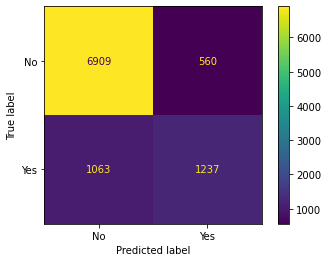

In [124]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)